# 🌽 Maize Yield Prediction (Zambia Dataset)
Welcome to this AI/ML notebook based on a synthetic dataset simulating Zambian agriculture data. This notebook demonstrates how to load the dataset, perform EDA, train a model, and evaluate its performance.

**Created by: Abel Bihinda**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [ ]:
#Load Data
url = 'https://raw.githubusercontent.com/ZED-AI-Lab/zed-ai-lab-arrant-engines/main/datasets/maize_yield_dataset.csv'
df = pd.read_csv(url)
df.head()


,Province,Soil_Type,Rainfall_mm,Temperature_C,Fertilizer_kg_per_hectare,Seed_Variety,Pesticide_Usage,Yield_tons_per_hectare
0,Southern,Sandy,826.7,21.8,126.2,Hybrid-B,Low,2.72
1,Copperbelt,Clay,599.7,25.8,80.5,Hybrid-A,High,2.77
2,Central,Loamy,857.0,21.5,63.9,Local,Low,2.23
3,Southern,Loamy,891.6,28.3,68.7,Hybrid-B,Medium,3.59
4,Southern,Loamy,884.0,26.2,85.4,Hybrid-B,High,4.76


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Province                   1000 non-null   object 
 1   Soil_Type                  1000 non-null   object 
 2   Rainfall_mm                1000 non-null   float64
 3   Temperature_C              1000 non-null   float64
 4   Fertilizer_kg_per_hectare  1000 non-null   float64
 5   Seed_Variety               1000 non-null   object 
 6   Pesticide_Usage            1000 non-null   object 
 7   Yield_tons_per_hectare     1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


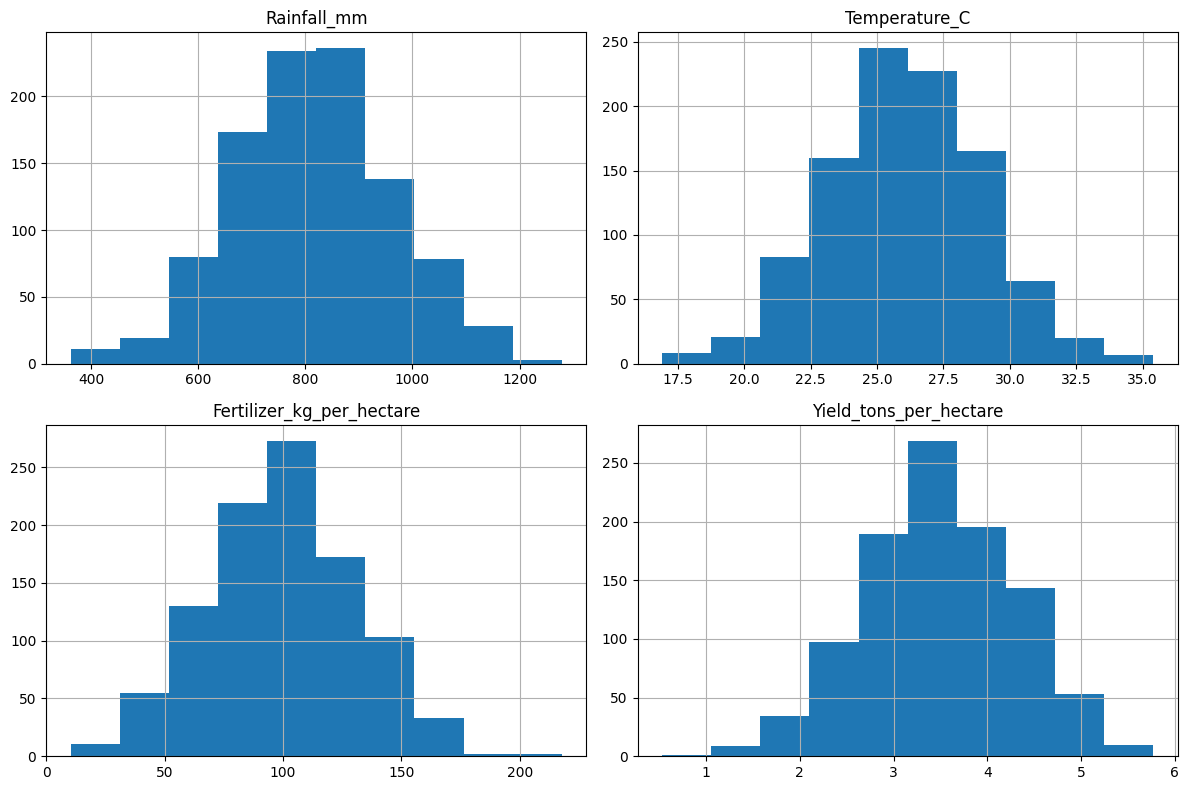

In [4]:
# Visualize numerical features
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [5]:
# Encode categorical variables
le = LabelEncoder()
for col in ['Province', 'Soil_Type', 'Seed_Variety', 'Pesticide_Usage']:
    df[col] = le.fit_transform(df[col])
df.head()


,Province,Soil_Type,Rainfall_mm,Temperature_C,Fertilizer_kg_per_hectare,Seed_Variety,Pesticide_Usage,Yield_tons_per_hectare
0,3,2,826.7,21.8,126.2,1,1,2.72
1,1,0,599.7,25.8,80.5,0,0,2.77
2,0,1,857.0,21.5,63.9,2,1,2.23
3,3,1,891.6,28.3,68.7,1,2,3.59
4,3,1,884.0,26.2,85.4,1,0,4.76


In [6]:
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Load dataset
url = 'https://raw.githubusercontent.com/ZED-AI-Lab/zed-ai-lab-arrant-engines/main/datasets/maize_yield_dataset.csv'
df = pd.read_csv(url)

# Encode categorical variables
for col in ['Province', 'Soil_Type', 'Seed_Variety', 'Pesticide_Usage']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Prepare data
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model to models folder
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/maize_yield_model.pkl")


['models/maize_yield_model.pkl']